In [57]:
import os
import sys
import yaml
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.model_selection import StratifiedKFold

sns.set_palette('Set2')

if str(Path(os.path.abspath(" ")).parents[3]) not in sys.path:
    sys.path.append(str(Path(os.path.abspath(" ")).parents[3]))

from mtsmorf.io.move.read import read_move_trial_epochs, read_trial_metadata

%load_ext autoreload
%autoreload 2

In [16]:
with open(Path(os.path.abspath('')).parents[3] / "motor-decoding/mtsmorf/move_exp/config.yml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

with open(Path(os.path.abspath('')).parents[3] / "motor-decoding/mtsmorf/move_exp/metadata.yml") as f:
    metadata = yaml.load(f, Loader=yaml.FullLoader)

bids_root = Path(config["bids_root"])
results_path = Path(config["results_path"])

print(f"bids_root: {bids_root}")
print(f"results_path: {results_path}")

bids_root: /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri
results_path: /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri/derivatives/mtmorf


In [40]:
resample_rate = 500
rng = 1
n_splits = 5
cv = StratifiedKFold(n_splits)
metrics = dict(
    accuracy="accuracy",
    cohen_kappa_score=make_scorer(cohen_kappa_score),
    roc_auc_ovr="roc_auc_ovr",
)

# Load raw data

In [17]:
subject = "efri07"
epochs = read_move_trial_epochs(bids_root, subject, resample_rate=None)
epochs.load_data()
trials_metadata = pd.DataFrame(read_trial_
metadata(bids_root, subject))

Analyzing bids dataset: /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_ieeg.vhdr with tmin=-0.2 and tmax=0.5 time-locked to Left Target.
Loaded in behavioral df: Index(['trial_id', 'successful_trial_flag', 'reaction_time', 'n_reaction_time',
       'r_reaction_time', 'missed_target_flag', 'speed_instruction',
       'speed_ratio', 'correct_speed_flag', 'force_angular', 'force_magnitude',
       'target_direction', 'x_position', 'y_position'],
      dtype='object')
Extracting parameters from /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_ieeg.vhdr...
Setting channel info structure...
Reading events from /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri/sub-efri07/ses-efri/ieeg/sub-efri07_ses-efri_task-move_acq-seeg_run-01_events.tsv.
Reading channel info from /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri/sub-efri07/ses-efri/ieeg/sub-efri

In [22]:
trials_metadata.head()

,trial_idx,subject,perturbed,fixation_trial,target_direction,success,reaction_time,correct_speed,speed_instruction,beh_fname,event_fname,start_trial_id,end_trial_id,trial_duration,avg_speed,std_speed
0,0,efri07,False,False,2,False,NaN,0,slow,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None
1,1,efri07,False,False,0,True,0.7965,0,slow,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None
2,2,efri07,False,False,1,True,0.7825,0,slow,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None
3,3,efri07,False,False,2,True,1.1220,1,fast,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None
4,4,efri07,True,False,0,True,0.9900,0,fast,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None


In [25]:
stable_trials = trials_metadata.query("perturbed == False & success == True")
stable_trials.head()

,trial_idx,subject,perturbed,fixation_trial,target_direction,success,reaction_time,correct_speed,speed_instruction,beh_fname,event_fname,start_trial_id,end_trial_id,trial_duration,avg_speed,std_speed
1,1,efri07,False,False,0,True,0.7965,0,slow,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None
2,2,efri07,False,False,1,True,0.7825,0,slow,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None
3,3,efri07,False,False,2,True,1.1220,1,fast,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None
6,6,efri07,False,False,0,True,0.8665,0,slow,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None
7,7,efri07,False,False,2,True,1.1300,0,slow,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,/Users/ChesterHuynh/OneDrive - Johns Hopkins/e...,None,None,None,None,None


In [38]:
labels = stable_trials.target_direction.values

# Apply Hilbert Transform

In [79]:
frequency_bands = dict(
    delta=(0.5, 4),
    theta=(4, 8),
    alpha=(8, 13),
    beta=(13, 30),
    gamma=(30, 70),
    hi_gamma=(70, 200),
)

epochs_data = epochs.get_data()
ntrials, nchs, nsteps = epochs_data.shape
hilbert_data = {}
for band, (l_freq, h_freq) in frequency_bands.items():
    epochs_band = epochs.copy().filter(l_freq=l_freq, h_freq=h_freq).apply_hilbert(envelope=True)
    epochs_band = epochs_band.resample(resample_rate)
    hilbert_data[band] = epochs_band.get_data()

Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 3301 samples (6.602 sec)

<ipython-input-79-1fca9aa2aa57>:14: RuntimeWarning: filter_length (3301) is longer than the signal (350), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_band = epochs.copy().filter(l_freq=l_freq, h_freq=h_freq).apply_hilbert(envelope=True)
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming wind

## Classify `target_direction` for each frequency band individually

In [80]:
from rerf.rerfClassifier import rerfClassifier
from mtsmorf.move_exp.cv import cv_fit
from tqdm import tqdm

scores = {}
for band, data in tqdm(hilbert_data.items()):
    ntrials, nchs, nsteps = data.shape
    X = data.reshape(ntrials, -1)
    y = labels
    
    clf = rerfClassifier(
        projection_matrix="MT-MORF",
        max_features="auto",
        n_jobs=-1,
        random_state=rng,
        image_height=nchs,
        image_width=nsteps,
    )
    scores[band] = cv_fit(clf, X, y, cv=cv, metrics=metrics, n_jobs=1, return_estimator=True)

100%|██████████| 6/6 [05:06<00:00, 51.08s/it]


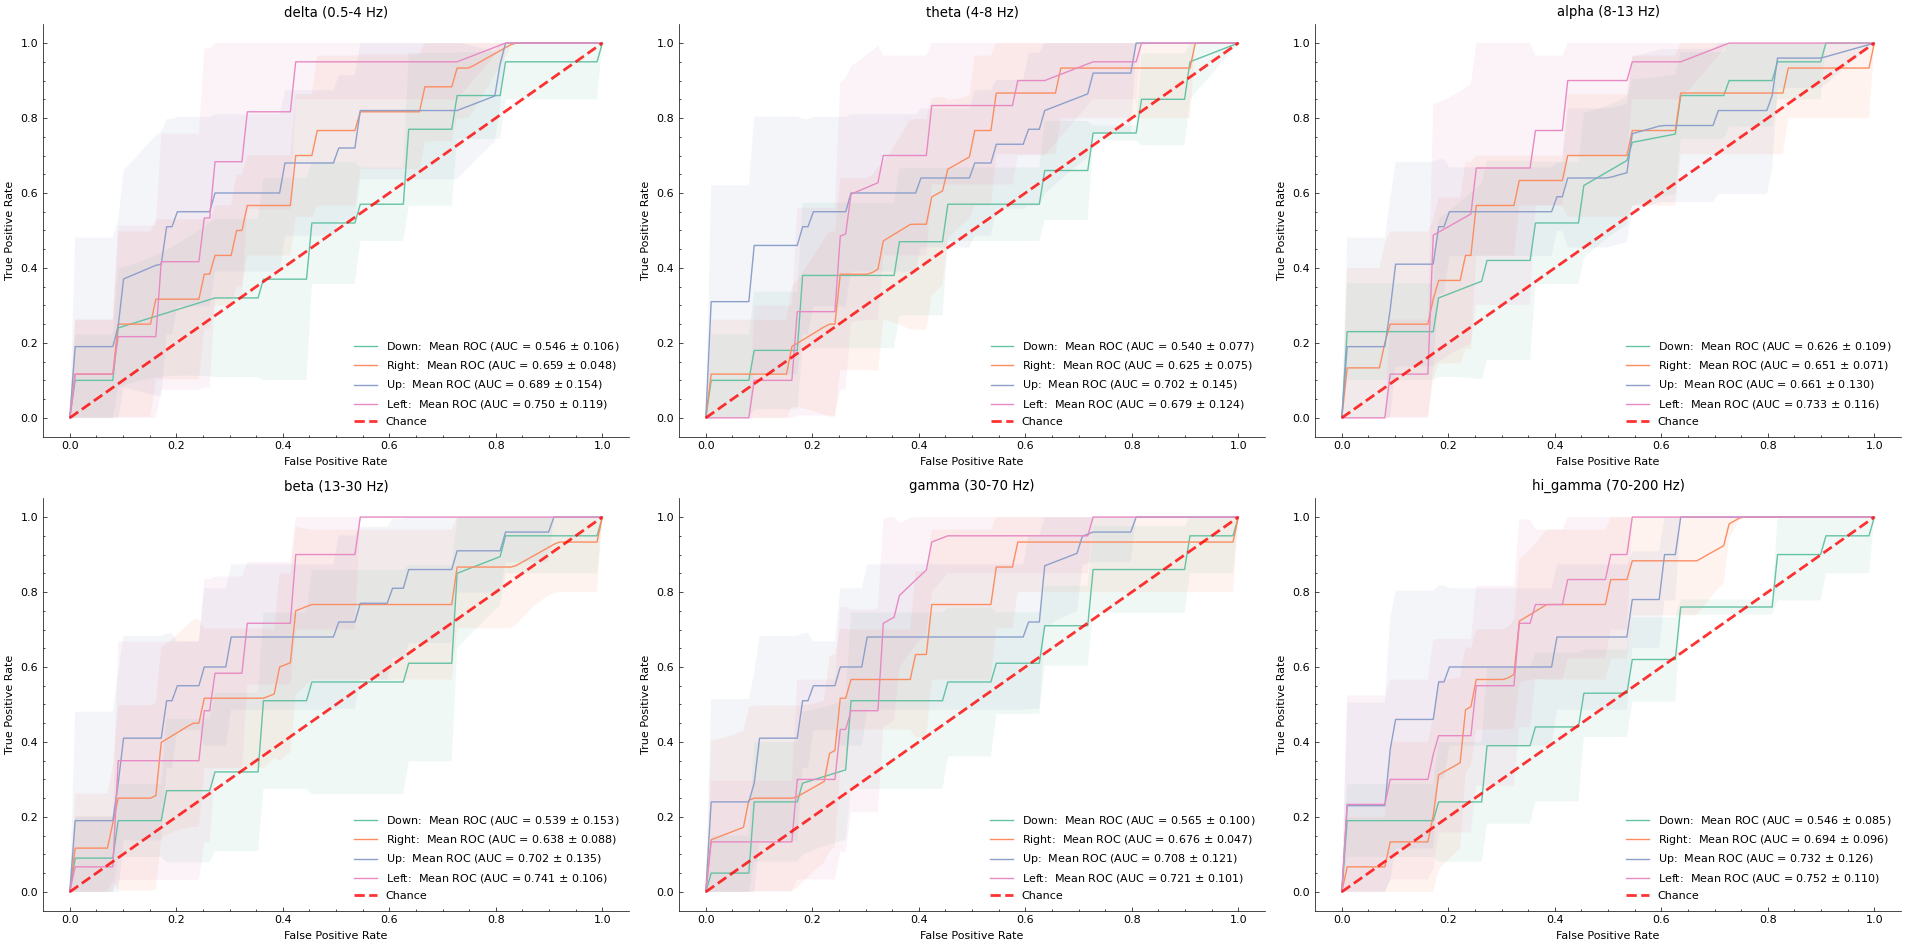

In [81]:
from mtsmorf.move_exp.plotting import plot_roc_multiclass_cv
fig, axs = plt.subplots(2, 3, dpi=100, figsize=(6.4*3, 4.8*2))
axs = axs.flatten()

for ax, (band, score) in zip(axs, scores.items()):
    plot_roc_multiclass_cv(
        score["test_predict_proba"], labels, score["test_inds"], label="", show_chance=True, ax=ax
    )
    ax.set_title(f"{band} ({frequency_bands[band][0]}-{frequency_bands[band][1]} Hz)")
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top=False)         # ticks along the top edge are off
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        right=False)         # ticks along the top edge are off
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
fig.tight_layout();

## Classify `target_direction` with all frequency bands stacked

In [82]:
data = np.stack(list(hilbert_data.values()), axis=2)

ntrials, nchs, nfreqs, nsteps = data.shape
X = data.reshape(ntrials, -1)
y = labels

clf = rerfClassifier(
    projection_matrix="MT-MORF",
    max_features="auto",
    n_jobs=-1,
    random_state=rng,
    image_height=nchs*nfreqs,
    image_width=nsteps,
)
scores_stacked = cv_fit(clf, X, y, cv=cv, metrics=metrics, n_jobs=1, return_estimator=True)

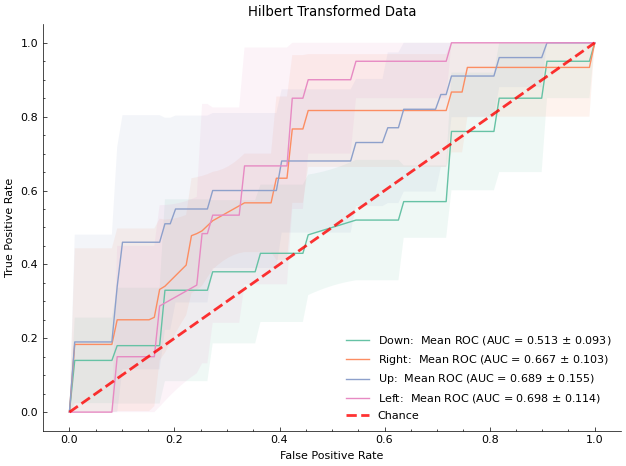

In [83]:
fig, ax = plt.subplots(dpi=100, figsize=(6.4, 4.8))

plot_roc_multiclass_cv(
    scores_stacked["test_predict_proba"], labels, scores_stacked["test_inds"], label="", show_chance=True, ax=ax
)
ax.set_title("Hilbert Transformed Data")
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False)         # ticks along the top edge are off
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False)         # ticks along the top edge are off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout();